#### Implement K-Nearest Neighbors (KNN) classification and its types, evaluate performance for different K values, and integrate basic MLOps steps for reproducibility and tracking.
use the Iris dataset from sklearn.datasets (no external file needed)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", X.shape)
print("Classes:", iris.target_names)
print("Target distribution:")
print(df['species'].value_counts())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']
Target distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [12]:
# Data Preparation
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed with feature scaling.")

Training set shape: (105, 4)
Test set shape: (45, 4)
Data preparation completed with feature scaling.


In [13]:
# Test different K values to find the best one
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_accuracies = []
test_accuracies = []

print("Testing different K values:")
print("K\tTrain Accuracy\tTest Accuracy")
print("-" * 35)

for k in k_values:
    # Create and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calculate accuracies
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"{k}\t{train_acc:.4f}\t\t{test_acc:.4f}")

# Find best K
best_k_idx = np.argmax(test_accuracies)
best_k = k_values[best_k_idx]
best_accuracy = test_accuracies[best_k_idx]

print(f"\nBest K: {best_k} with test accuracy: {best_accuracy:.4f}")

Testing different K values:
K	Train Accuracy	Test Accuracy
-----------------------------------
1	1.0000		0.9333
3	0.9714		0.9111
5	0.9810		0.9111
7	0.9810		0.9333
9	0.9714		0.9556
11	0.9714		0.9556
13	0.9714		0.9333
15	0.9810		0.9333

Best K: 9 with test accuracy: 0.9556


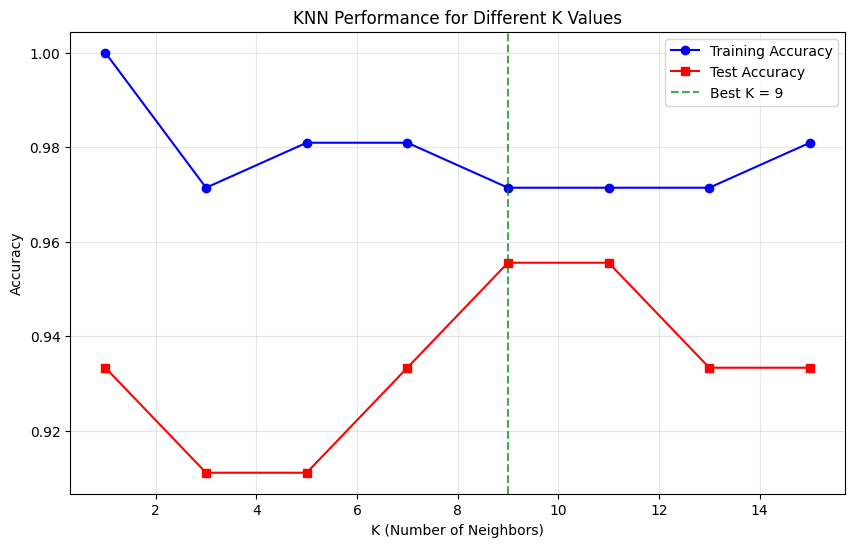

In [14]:
# Visualize K value performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(k_values, test_accuracies, 's-', label='Test Accuracy', color='red')
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'Best K = {best_k}')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Performance for Different K Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# Test different KNN types with the best K value
knn_types = {
    'Uniform Weights + Euclidean': {'weights': 'uniform', 'metric': 'euclidean'},
    'Distance Weights + Euclidean': {'weights': 'distance', 'metric': 'euclidean'},
    'Uniform Weights + Manhattan': {'weights': 'uniform', 'metric': 'manhattan'},
    'Distance Weights + Manhattan': {'weights': 'distance', 'metric': 'manhattan'}
}

print(f"Comparing different KNN types with K = {best_k}:")
print("=" * 60)

results = {}
for name, params in knn_types.items():
    # Create and train KNN model
    knn = KNeighborsClassifier(n_neighbors=best_k, **params)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'model': knn,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name}: {accuracy:.4f}")

# Find best KNN type
best_type = max(results.keys(), key=lambda x: results[x]['accuracy'])
print(f"\nBest KNN type: {best_type}")
print(f"Best accuracy: {results[best_type]['accuracy']:.4f}")

Comparing different KNN types with K = 9:
Uniform Weights + Euclidean: 0.9556
Distance Weights + Euclidean: 0.9333
Uniform Weights + Manhattan: 0.9111
Distance Weights + Manhattan: 0.9111

Best KNN type: Uniform Weights + Euclidean
Best accuracy: 0.9556


Classification Report for Best Model:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


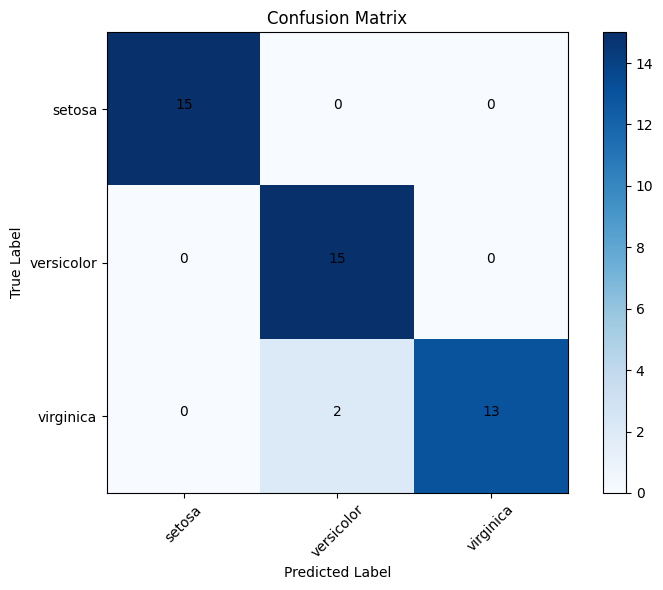

In [16]:
# Detailed evaluation of the best model
best_model = results[best_type]['model']
best_predictions = results[best_type]['predictions']

print("Classification Report for Best Model:")
print("=" * 50)
print(classification_report(y_test, best_predictions, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Add text annotations
for i in range(len(iris.target_names)):
    for j in range(len(iris.target_names)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [17]:
# Summary and Final Results
print("KNN Classification Summary:")
print("=" * 40)
print(f"Dataset: Iris (150 samples, 4 features, 3 classes)")
print(f"Train/Test Split: 70%/30%")
print(f"Feature Scaling: StandardScaler applied")
print(f"Best K Value: {best_k}")
print(f"Best KNN Type: {best_type}")
print(f"Best Test Accuracy: {results[best_type]['accuracy']:.4f}")

# Create results comparison table
print("\nAll KNN Types Comparison:")
print("-" * 50)
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.4f}")

# Show prediction examples
print("\nSample Predictions:")
print("-" * 30)
sample_indices = [0, 15, 30]  # Sample a few test examples
for i in sample_indices:
    true_class = iris.target_names[y_test[i]]
    pred_class = iris.target_names[best_predictions[i]]
    print(f"Sample {i+1}: True={true_class}, Predicted={pred_class}")

print("\nKNN Classification completed successfully!")

KNN Classification Summary:
Dataset: Iris (150 samples, 4 features, 3 classes)
Train/Test Split: 70%/30%
Feature Scaling: StandardScaler applied
Best K Value: 9
Best KNN Type: Uniform Weights + Euclidean
Best Test Accuracy: 0.9556

All KNN Types Comparison:
--------------------------------------------------
Uniform Weights + Euclidean: 0.9556
Distance Weights + Euclidean: 0.9333
Uniform Weights + Manhattan: 0.9111
Distance Weights + Manhattan: 0.9111

Sample Predictions:
------------------------------
Sample 1: True=virginica, Predicted=virginica
Sample 16: True=virginica, Predicted=virginica
Sample 31: True=virginica, Predicted=virginica

KNN Classification completed successfully!
